In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day48-simple-linear-regression/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

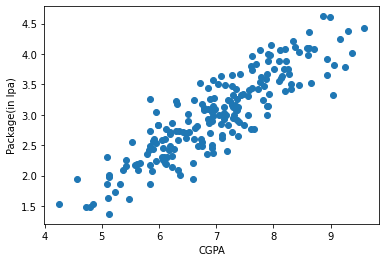

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_test.shape

(40, 1)

In [9]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lr=LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

array([3.89111601])

In [14]:
lr.score(X_test,y_test)

0.780730147510384

Text(0, 0.5, 'Package(in lpa)')

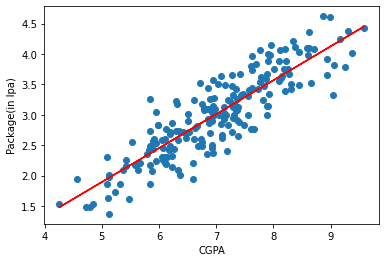

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(df.cgpa,lr.predict(X),color="red")
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [16]:
lr.intercept_

-0.8961119222429144

In [17]:
lr.coef_

array([0.55795197])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
y_pred=lr.predict(X_test)

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [25]:
mean_absolute_error(y_test,y_pred)

0.2884710931878175

In [26]:
mean_squared_error(y_test,y_pred)

0.12129235313495527

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.34827051717731616

In [35]:
r2=r2_score(y_test,y_pred)

In [36]:
r2

0.780730147510384

In [34]:
#adjusted r2 score
X_test.shape

(40, 1)

In [39]:
adj_r2=1-((1-r2)*(40-1))/(40-1-1)

In [40]:
adj_r2

0.7749598882343415

In [47]:
new_df=df.copy()
new_df["random_feature"]=np.random.rand(200)
new_df=new_df[["cgpa","random_feature","package"]]


In [48]:
new_df

,cgpa,random_feature,package
0,6.89,0.841718,3.26
1,5.12,0.989147,1.98
2,7.82,0.890318,3.25
3,7.42,0.141429,3.67
4,6.94,0.676672,3.57
...,...,...,...
195,6.93,0.159527,2.46
196,5.89,0.494735,2.57
197,7.21,0.537039,3.24
198,7.63,0.240744,3.96


Text(0, 0.5, 'Package(in lpa)')

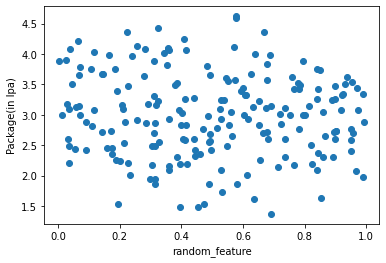

In [49]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [51]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [53]:

lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:

y_pred = lr.predict(X_test)

In [56]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7826110156432399


In [57]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7708602597320636

In [59]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [60]:
new_df2.sample(5)

,cgpa,iq,package
160,7.13,3.53,2.93
183,7.28,3.22,2.72
194,7.89,2.97,3.67
163,8.93,4.71,3.91
57,6.60,1.94,1.94


Text(0, 0.5, 'Package(in lpa)')

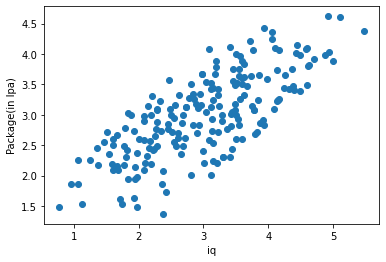

In [61]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [62]:
np.random.randint(-100,100)

82

In [63]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [66]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8150664686415524


In [67]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8050700615410957